# Python Learn by Doing: Climate Change Indicators, Your Turn! Option 1
Developed By: Dr. Kerrie Geil, Mississippi State University

Date: May 2024

Link: notebook available to download at

# Import packages and define workspace

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
# path to your working directory (where this notebook is on your computer)
work_dir = r'C://Users/kerrie/Documents/01_LocalCode/repos/MSU_py_training/learn_by_doing/climate_change_indicators/' 

# path to the data files
data_dir = work_dir+r'data/AgERA5_daily/'

# Data Cleaning

Normally, we would run through the data cleaning suggested by ETCCDI here. However, we've already done the data cleaning steps in climate_change_indicators.ipynb and found that the leap days step was the only step where we replaced any data values with nan. We'll repeat only that step here.

In [3]:
tn = xr.open_dataarray(data_dir+'tmin_AgERA5_Starkville_Daily_1979-2023.nc')
tn = tn.squeeze()

tx = xr.open_dataarray(data_dir+'tmax_AgERA5_Starkville_Daily_1979-2023.nc')
tx = tx.squeeze()

tn

<xarray.DataArray 'tmin' (time: 16436)> Size: 66kB
[16436 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 131kB 1979-01-01 1979-01-02 ... 2023-12-31
    lon      float64 8B -88.8
    lat      float64 8B 33.5
Attributes:
    long_name:             Minimum air temperature at 2 meter (00-00LT)
    temporal_aggregation:  Min 00-00LT
    units:                 degrees_C
    standard_name:         2m_min_air_temperature

In [4]:
#### leap days (i.e Feb 29th)
# here we'll fill leap days with nan but to calculate certain climate change indicators later we may need to drop leap days entirely

# first let's double check that the time dimension is the same for all of our data arrays
assert list(tn.time.data)==list(tx.time.data), 'tn.time and tx.time are not equal'

# create a boolean array of dim 'time' where leapdays are True and all other days are False
isleapday=xr.where((tn.time.dt.day==29) & (tn.time.dt.month==2),True,False)

# fill leapdays with nan
tx=xr.where(isleapday,np.nan,tx)
tn=xr.where(isleapday,np.nan,tn)

#  Climate change indicator: monthly mean daily temperature range (DTR)

In [5]:
dtr_daily=tx-tn
dtr_daily

<xarray.DataArray (time: 16436)> Size: 66kB
array([18.465302,  7.441967, 11.815088, ...,  7.399746, 11.88794 ,
       14.597853], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 131kB 1979-01-01 1979-01-02 ... 2023-12-31
    lon      float64 8B -88.8
    lat      float64 8B 33.5

In [6]:
# create an index for every month in the timeseries
month_groups=pd.MultiIndex.from_arrays([tn.time['time.year'].data,tn.time['time.month'].data])

# add the month_groups index the time coordinate labels
dtr_daily.coords['month_groups']=('time',month_groups) 

dtr_daily

<xarray.DataArray (time: 16436)> Size: 66kB
array([18.465302,  7.441967, 11.815088, ...,  7.399746, 11.88794 ,
       14.597853], dtype=float32)
Coordinates:
  * time          (time) datetime64[ns] 131kB 1979-01-01 ... 2023-12-31
    lon           float64 8B -88.8
    lat           float64 8B 33.5
    month_groups  (time) object 131kB (1979, 1) (1979, 1) ... (2023, 12)

In [7]:
# calculate mean daily temperature range for each month
DTR=dtr_daily.groupby('month_groups').mean()

# change the month_groups dim name and coordinate labels to datetimes
time_months=pd.date_range(tx.time.data[0],tx.time.data[-1],freq='MS') # create datetimes
DTR=DTR.rename({'month_groups':'time'})
DTR=DTR.drop_vars(['time_level_0','time_level_1']) # we don't need these leftovers
DTR.coords['time']=('time',time_months)  

DTR

<xarray.DataArray (time: 540)> Size: 2kB
array([ 9.684496 , 10.318652 , 11.785261 , 10.544359 , 10.483215 ,
       11.600789 ,  8.170211 , 10.182577 ,  9.122986 , 12.59689  ,
       11.396028 , 10.80255  ,  8.730293 , 11.339033 , 11.116851 ,
       12.151456 , 10.158979 , 11.370473 , 10.844099 , 11.111877 ,
       10.283704 , 11.649328 , 10.337601 , 11.191501 , 10.472972 ,
       11.582581 , 12.163596 , 11.356958 , 11.419028 , 10.199788 ,
       10.379909 , 10.298633 , 12.131801 , 10.032063 , 11.653209 ,
        9.523604 , 11.184765 , 10.763319 , 10.476814 , 10.535526 ,
       12.255315 , 10.854699 ,  9.895018 ,  9.218815 , 10.64046  ,
       11.028289 , 10.0504675,  8.559587 ,  8.961232 ,  9.504049 ,
       10.634647 , 11.2087   , 10.418866 ,  9.252524 , 10.433018 ,
       10.7908125, 11.062765 , 11.251446 , 10.951587 ,  9.906838 ,
       11.154623 , 11.969347 , 11.9011755, 10.492861 , 11.6389675,
       12.320703 , 10.735913 ,  9.239951 , 11.051764 ,  9.477784 ,
       10.660366 ,  9.525891 , 11.006985 , 10.742201 , 10.832407 ,
       12.246114 , 11.025623 , 11.491468 , 10.468811 ,  9.920263 ,
       10.198716 ,  8.528808 ,  8.585026 , 10.933518 , 12.082105 ,
       10.969521 , 13.559539 , 13.985568 , 10.2806635, 10.259975 ,
       10.947512 , 10.517046 , 10.1249695,  9.846859 ,  7.8191323,
        8.67792  , 10.370378 ,  9.48861  , 12.100128 , 13.838137 ,
...
       10.685263 , 10.858495 , 10.34115  , 11.708307 , 11.09476  ,
       10.245812 ,  9.99488  , 11.384172 , 12.833912 , 12.370013 ,
        9.762067 ,  8.614322 , 10.83172  , 10.6995945, 11.818141 ,
       11.552881 ,  8.847128 , 10.358893 ,  8.801953 , 10.536802 ,
       11.067794 , 11.052038 , 10.042946 , 11.115285 , 10.108548 ,
       11.058479 , 11.796768 , 10.893458 , 10.384247 ,  9.838811 ,
       10.129946 ,  8.94598  ,  9.7539625,  9.635345 ,  8.859496 ,
        9.919591 ,  9.993924 , 10.976936 , 11.469985 , 11.049775 ,
       10.274721 , 10.029796 , 10.687837 , 11.909751 , 10.446476 ,
       12.291561 ,  9.620188 ,  9.872061 , 10.598081 ,  9.985693 ,
       11.191594 , 11.091059 , 10.299253 , 10.0809355, 10.549075 ,
        9.602905 , 11.125679 , 11.142331 , 11.243606 ,  9.188542 ,
       10.681682 , 10.94354  , 12.029005 , 10.426109 ,  9.387431 ,
        9.301258 ,  8.999198 ,  9.794046 , 10.350056 , 12.338542 ,
        9.66556  , 11.823769 , 11.9991045, 12.666053 , 11.775426 ,
       11.118231 , 11.699068 ,  9.758602 ,  8.577902 , 11.2239895,
       12.586348 , 10.433908 ,  8.624918 ,  9.807734 , 10.724092 ,
       11.285626 , 10.676512 , 10.52558  , 11.125934 ,  9.672968 ,
       10.921575 , 11.334082 , 11.14013  , 10.603983 , 10.677212 ],
      dtype=float32)
Coordinates:
    lon      float64 8B -88.8
    lat      float64 8B 33.5
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2023-12-01

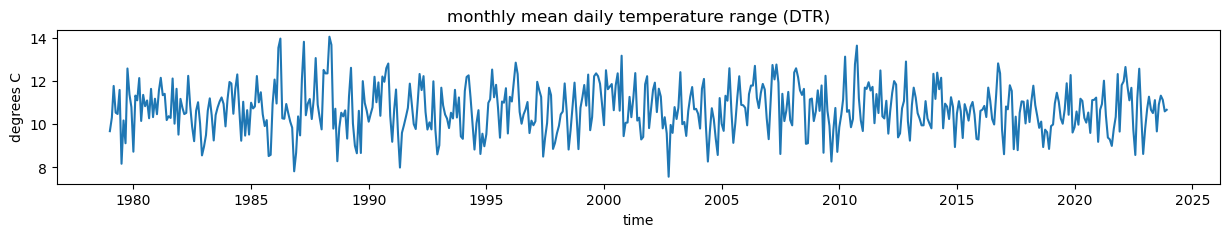

In [8]:
# plot
fig=plt.figure(figsize=(15,2))
DTR.plot()
plt.title('monthly mean daily temperature range (DTR)')
plt.ylabel('degrees C')
plt.show()

# Trend analysis

In [9]:
# linear regression and p value

DTR.coords['index']=('time',range(len(DTR.time)))

reg_info=ss.linregress(DTR.index,DTR)
trend=reg_info.slope*12*100 # C/month --> C/century
regline=reg_info.slope*DTR.index +reg_info.intercept

reg_info

LinregressResult(slope=-0.0001072399840791209, intercept=10.754109458180027, rvalue=-0.015242771654240626, pvalue=0.7237812909964381, stderr=0.00030328518833423626, intercept_stderr=0.09442362748189506)

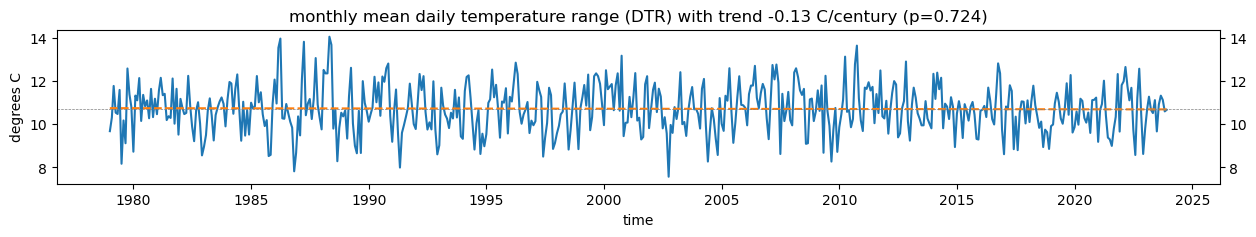

In [10]:
# plot the linear regression over the timeseries TNx
fig=plt.figure(figsize=(15,2))

DTR.plot()
regline.plot(linestyle='--')
plt.axhline(y=DTR.mean(),color='grey',linestyle='dashed',linewidth=0.5)
plt.tick_params(labelright=True, right=True)
plt.ylabel('degrees C')
plt.title(f'monthly mean daily temperature range (DTR) with trend {trend:.2f} C/century (p={reg_info.pvalue:.3f})')
plt.show()